__Importing header files and dataset of Sale__

In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

__Reading dataset__

In [395]:
df = pd.read_csv("Sales_Data.csv")

__Dataset contain 2 categorical variable and 11 Numerical variable__

In [396]:
df.head()

,Year,Quarter,Local Government Areas (LGAs),DwellingType,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,2018.0,4.0,Total,Total,290.00,400.00,550.00,443.00,7916.00,-0.02,0.00,0.00,-0.20
1,2018.0,4.0,Total,Non Strata,294.00,411.00,560.00,452.00,6801.00,-0.02,-0.02,0.01,-0.20
2,2018.0,4.0,Total,Strata,275.00,355.00,465.00,388.00,1115.00,-0.02,0.01,-0.01,-0.22
3,2018.0,4.0,Albury,Total,240.00,308.00,420.00,345.00,258.00,0.04,-0.04,0.09,-0.19
4,2018.0,4.0,Albury,Non Strata,275.00,360.00,443.00,377.00,211.00,0.06,0.08,0.15,-0.18


__Replacing - and s values with nan so that we can count the number of null values__

In [397]:
df = df.replace("-", np.nan)
df=df.replace("s",np.nan)

__Number of null values__

In [398]:
df.isnull().sum()

Year                                     0
Quarter                                  0
Local Government Areas (LGAs)            2
DwellingType                             5
First Quartile Sales Price\n$'000s     608
Median Sales Price\n$'000s             608
Third Quartile Sales Price\n'000s      608
Mean Sales Price\n$'000s               608
Sales\nNo.                            3237
Qtly change in Median                  613
Annual change in Median                617
Qtly change in Count                  2810
Annual change in Count                2810
dtype: int64

__We have used backward fill method to fill null value__

In [399]:
df= df.fillna(method='bfill')

In [400]:
df.head()

,Year,Quarter,Local Government Areas (LGAs),DwellingType,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,2018.0,4.0,Total,Total,290.00,400.00,550.00,443.00,7916.00,-0.02,0.00,0.00,-0.20
1,2018.0,4.0,Total,Non Strata,294.00,411.00,560.00,452.00,6801.00,-0.02,-0.02,0.01,-0.20
2,2018.0,4.0,Total,Strata,275.00,355.00,465.00,388.00,1115.00,-0.02,0.01,-0.01,-0.22
3,2018.0,4.0,Albury,Total,240.00,308.00,420.00,345.00,258.00,0.04,-0.04,0.09,-0.19
4,2018.0,4.0,Albury,Non Strata,275.00,360.00,443.00,377.00,211.00,0.06,0.08,0.15,-0.18


In [401]:
df.columns

Index(['Year', 'Quarter', 'Local Government Areas (LGAs)', 'DwellingType',
       'First Quartile Sales Price\n$'000s', 'Median Sales Price\n$'000s',
       'Third Quartile Sales Price\n'000s', 'Mean Sales Price\n$'000s',
       'Sales\nNo.', 'Qtly change in Median', 'Annual change in Median',
       'Qtly change in Count', 'Annual change in Count'],
      dtype='object')

__Here the dataset contail value total which is useless hence we are dropping__

In [402]:
df.drop(df.loc[df['Local Government Areas (LGAs)']=='Total'].index, inplace=True)

In [403]:
df.drop(df[df['Local Government Areas (LGAs)'] =='Total'].index, inplace = True) 

In [404]:
df.drop(df[df['DwellingType'] =='Total'].index, inplace = True) 

__Here we have shown the type of dwelling__

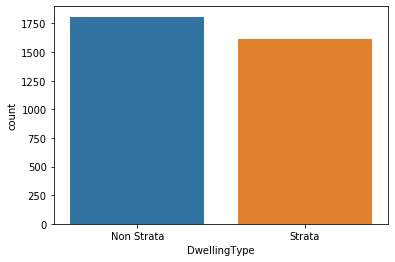

In [405]:
sns.countplot(x='DwellingType',data=df)

__It shows that the Non strata type of dwelling is slightly more in sales data in comparision to Strata__

In [408]:
%run scripts/Sales_Visualization.py

__Here we have drawn LGA with highest sales price__

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

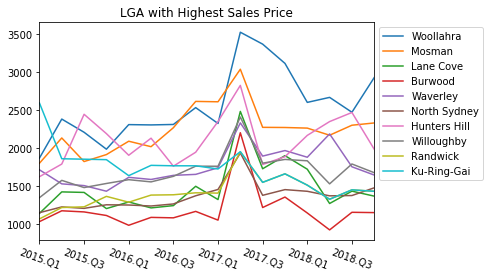

In [409]:
plt.figure(figsize=(15,10)) 
top_mean_df.transpose().plot()
plt.title('LGA with Highest Sales Price')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

__It shows that Woollahara has the highest sale price in year 2017 in quarter3__

__This graph Shows about LGA with maximum no of sales in different LGA__

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

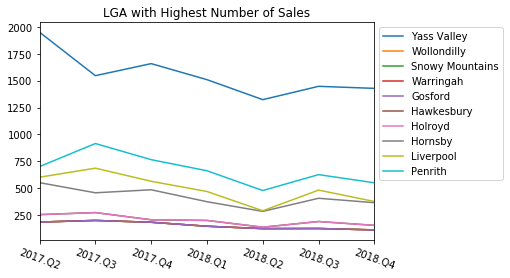

<Figure size 1080x720 with 0 Axes>

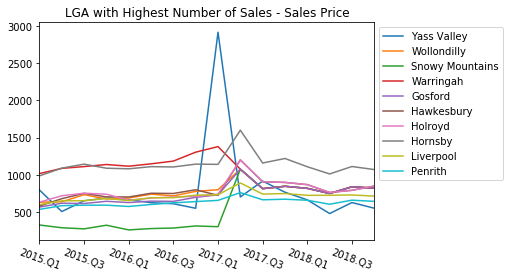

In [410]:
## plot New Bond Lodged
plt.figure(figsize=(15,10)) 
top_NB_df.transpose().plot()
plt.title('LGA with Highest Number of Sales')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

## Renting Price Mean of New Bond Lodge LGAs
plt.figure(figsize=(15,10))
top_nbmean_df.transpose().plot()
plt.title('LGA with Highest Number of Sales - Sales Price')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

__The upper graph shows that Yass Valley has the maximum number of sales for a long period of time in comparision to other__

__While the lower graph shows that Yass Valley show maximum sales in 2017 quater 1 and in quarter 3 of 2017 it has decrease as much as it increased__

In [411]:
top_NB_df

,2017.Q2,2017.Q3,2017.Q4,2018.Q1,2018.Q2,2018.Q3,2018.Q4
LGA,,,,,,,
Yass Valley,1950,1546,1658,1509,1323,1447,1428
Wollondilly,185,200,183,146,124,125,112
Snowy Mountains,185,200,183,146,124,125,112
Warringah,185,200,183,146,124,125,112
Gosford,185,200,183,146,124,125,112
Hawkesbury,254,273,206,200,137,190,154
Holroyd,254,273,206,200,137,190,154
Hornsby,551,457,485,374,284,406,365
Liverpool,602,686,564,469,290,482,376


In [412]:
%run scripts/PearsonValue.py

__This is correlation plot between different column which we have specified__

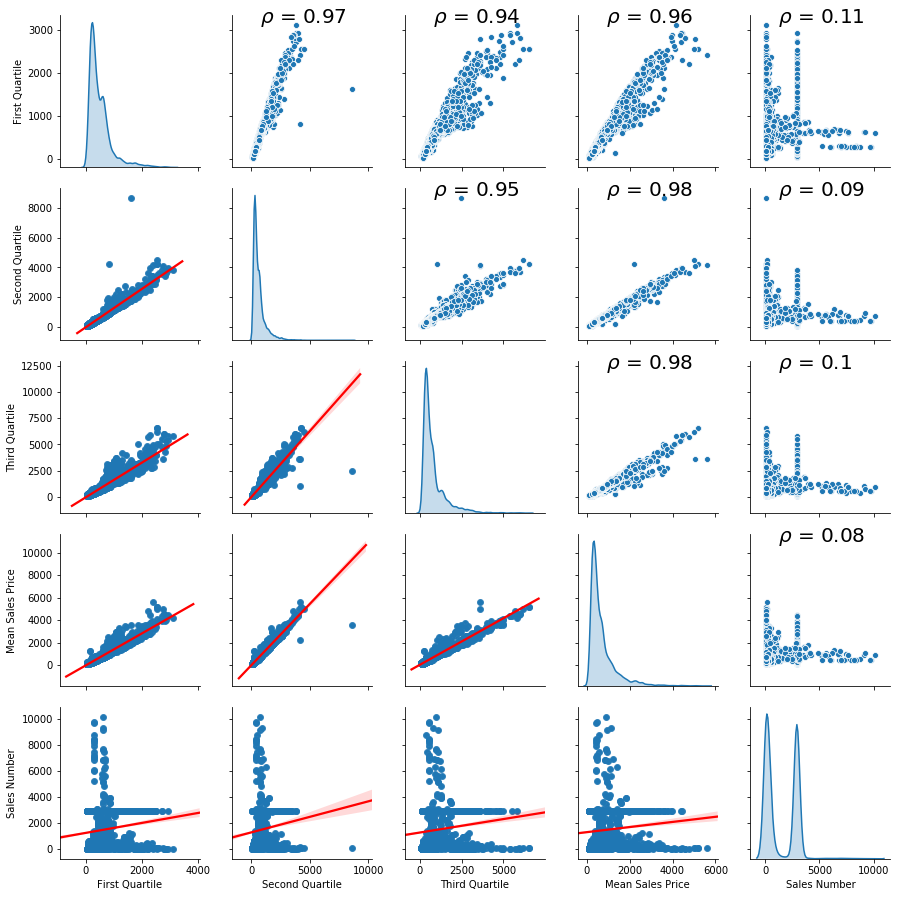

In [413]:
g = sns.pairplot(sales_df,
             vars = ['First Quartile', 'Second Quartile', 'Third Quartile', 'Mean Sales Price', 'Sales Number'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

__If the correlation value is close to 1 it means they are highly correlated while as the value reach close to 0 it means they are not related at all__

__This is a graph between Bond lodged vs Dwelling type__

Text(0.5, 1.0, 'Sales per Year')

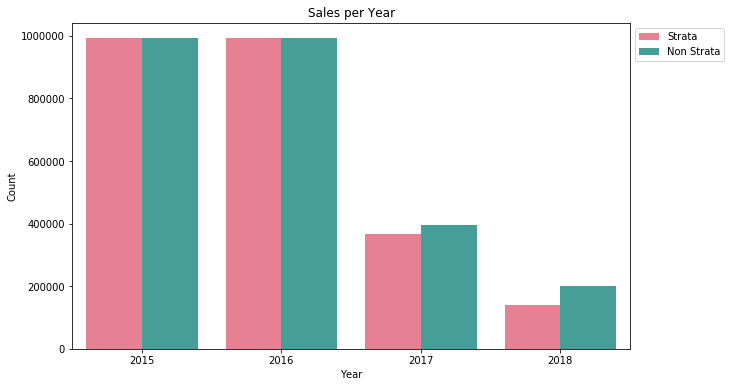

In [414]:
## Total Bond Lodged per year per dwelling type
plt.figure(figsize=(10,6)) 
 
sns.barplot(x = 'Year', 
            y = 'Count', 
            data = bond_count_df, 
            hue = 'Dwelling Type', 
            palette = 'husl',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Sales per Year')

__It shows that every year the sales per year has been equal for both strata and non strata or non_Strata has slighlty high sales in comparison to strata__

In [217]:
df.head()

,Year,Quarter,Local Government Areas (LGAs),DwellingType,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
4,2018.0,4.0,Albury,Non Strata,275.00,360.00,443.00,377.00,211.00,0.06,0.08,0.15,-0.18
5,2018.0,4.0,Albury,Strata,160.00,212.00,230.00,199.00,47.00,0.03,-0.10,-0.13,-0.20
7,2018.0,4.0,Armidale Regional,Non Strata,290.00,355.00,461.00,388.00,116.00,0.04,0.03,0.61,0.05
8,2018.0,4.0,Armidale Regional,Strata,175.00,199.00,245.00,218.00,175.00,-0.22,-0.20,0.44,-0.28
10,2018.0,4.0,Ballina,Non Strata,545.00,660.00,848.00,726.00,115.00,-0.05,0.03,-0.08,-0.13


__Here we have created dummy variable of LGA to predict the sales of a particular LGA__

In [420]:
s=pd.get_dummies(df,columns=["Local Government Areas (LGAs)"])

In [421]:
s.head()

,Year,Quarter,DwellingType,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,...,Local Government Areas (LGAs)_Western Plains Regional,Local Government Areas (LGAs)_Willoughby,Local Government Areas (LGAs)_Wingecarribee,Local Government Areas (LGAs)_Wollondilly,Local Government Areas (LGAs)_Wollongong,Local Government Areas (LGAs)_Woollahra,Local Government Areas (LGAs)_Wyong,Local Government Areas (LGAs)_Yass Valley,Local Government Areas (LGAs)_uralla,Local Government Areas (LGAs)_walcha
4,2018.0,4.0,Non Strata,275.00,360.00,443.00,377.00,211.00,0.06,0.08,...,0,0,0,0,0,0,0,0,0,0
5,2018.0,4.0,Strata,160.00,212.00,230.00,199.00,47.00,0.03,-0.10,...,0,0,0,0,0,0,0,0,0,0
7,2018.0,4.0,Non Strata,290.00,355.00,461.00,388.00,116.00,0.04,0.03,...,0,0,0,0,0,0,0,0,0,0
8,2018.0,4.0,Strata,175.00,199.00,245.00,218.00,175.00,-0.22,-0.20,...,0,0,0,0,0,0,0,0,0,0
10,2018.0,4.0,Non Strata,545.00,660.00,848.00,726.00,115.00,-0.05,0.03,...,0,0,0,0,0,0,0,0,0,0


__It shows that there are 197 columns after using dummy variables__

In [422]:
s.columns

Index(['Year', 'Quarter', 'DwellingType', 'First Quartile Sales Price\n$'000s',
       'Median Sales Price\n$'000s', 'Third Quartile Sales Price\n'000s',
       'Mean Sales Price\n$'000s', 'Sales\nNo.', 'Qtly change in Median',
       'Annual change in Median',
       ...
       'Local Government Areas (LGAs)_Western Plains Regional',
       'Local Government Areas (LGAs)_Willoughby',
       'Local Government Areas (LGAs)_Wingecarribee',
       'Local Government Areas (LGAs)_Wollondilly',
       'Local Government Areas (LGAs)_Wollongong',
       'Local Government Areas (LGAs)_Woollahra',
       'Local Government Areas (LGAs)_Wyong',
       'Local Government Areas (LGAs)_Yass Valley',
       'Local Government Areas (LGAs)_uralla',
       'Local Government Areas (LGAs)_walcha'],
      dtype='object', length=197)

__Here we have dropped Dwelling type cause we already got things related to dwelling and now we want to predict LGA__

In [423]:
s = s.drop(["DwellingType"], axis=1)

__We have considered Wollahra area as our target variable__

In [424]:
Y=s['Local Government Areas (LGAs)_Woollahra']

__t is conisdered as our features to predict target variable__

In [ ]:
t=s.drop(['Local Government Areas (LGAs)_Woollahra'],axis=1)

__FIRST MODEL WE ARE USING IS DECISION TREE__

In [425]:
X=t
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [426]:
y_pred_en=clf_entropy.predict(X_test)

In [427]:
print(y_pred_en)

[0 0 0 ... 0 0 0]


__It shows that this method is 99 percent accurate in predicting result that mean price given is from wollahra__

In [429]:
print("Accuracy is ",accuracy_score(y_test,y_pred_en)*100)

Accuracy is  99.0272373540856


In [231]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


__2 Method -RANDOM FOREST__

In [430]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
#X=s.values[:,4:13]
Y=s['Local Government Areas (LGAs)_Woollahra']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

0.008657587548638133


C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


__Mean absolute error is 0.008 which is very close to 0 hence the error is really less__

In [333]:
#X=s.values[:,4:13]
#Y=s['Local Government Areas (LGAs)_Woollahra']
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)


In [431]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


__3 METHOD - SUPPORT VECTOR CLASSIFIER__

In [432]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))


C:\Users\61478\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:
0.9897959183673469


In [336]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9897959183673469


__Accuracy score of SVC is around 98 percent which is still 1 percent less than decision tree__

In [434]:
import pandas as pd
from sklearn.neural_network import MLPClassifier

In [435]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.30, random_state=27)

__Method 4 - NEURAL NETWORK__

In [436]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=20, alpha=0.01,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(x_train, y_train)
y1_pred = clf.predict(x_test)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 157.81515929
Iteration 4, loss = 242.36157854
Iteration 5, loss = 270.92011431
Iteration 6, loss = inf
Iteration 7, loss = 280.52959999
Iteration 8, loss = 281.08497623
Iteration 9, loss = 281.26672948
Iteration 10, loss = 281.31551337
Iteration 11, loss = 281.32792577
Iteration 12, loss = 281.32818783
Iteration 13, loss = 281.32628750
Iteration 14, loss = 281.32320166
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


In [437]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
x=accuracy_score(y_test, y1_pred)
print(x)

0.9873540856031129


__Neural network accuracy is also 98 which is similar to support vector__

In [438]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [439]:
models = [
           ['Lm: ', LinearRegression()],
           ['RFR:' , RandomForestRegressor()],
           ['DTR ', DecisionTreeRegressor()],
           ['GBM: ', GradientBoostingRegressor()] 
         ]

In [440]:
t=s.drop(['Local Government Areas (LGAs)_Woollahra'],axis=1)
X=t
Y=s['Local Government Areas (LGAs)_Woollahra']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.30, random_state=27)

__We are comparing R2 and RMSE score of different model to show which one is better__

In [441]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    
    model_data.append(curr_model_data)

C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


__These 4 model train time ,train R2 score,Test R2 score, and Test RMSE score are given__

In [442]:
model_data

[{'Name': 'Lm: ',
  'Train_Time': 0.10642623901367188,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 1.0,
  'Test_RMSE_Score': 3.2792376496942163e-13},
 {'Name': 'RFR:',
  'Train_Time': 0.1641550064086914,
  'Train_R2_Score': 0.9196642562929062,
  'Test_R2_Score': 0.4600954907161803,
  'Test_RMSE_Score': 0.08210508593373964},
 {'Name': 'DTR ',
  'Train_Time': 0.0548853874206543,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.4546419098143236,
  'Test_RMSE_Score': 0.08251871618851556},
 {'Name': 'GBM: ',
  'Train_Time': 1.0837442874908447,
  'Train_R2_Score': 0.9562836194012669,
  'Test_R2_Score': 0.46702562338086573,
  'Test_RMSE_Score': 0.08157643981372122}]

In [443]:
gf = pd.DataFrame(model_data)
print(gf)

    Name  Test_R2_Score  Test_RMSE_Score  Train_R2_Score  Train_Time
0   Lm:        1.000000     3.279238e-13        1.000000    0.106426
1   RFR:       0.460095     8.210509e-02        0.919664    0.164155
2   DTR        0.454642     8.251872e-02        1.000000    0.054885
3  GBM:        0.467026     8.157644e-02        0.956284    1.083744


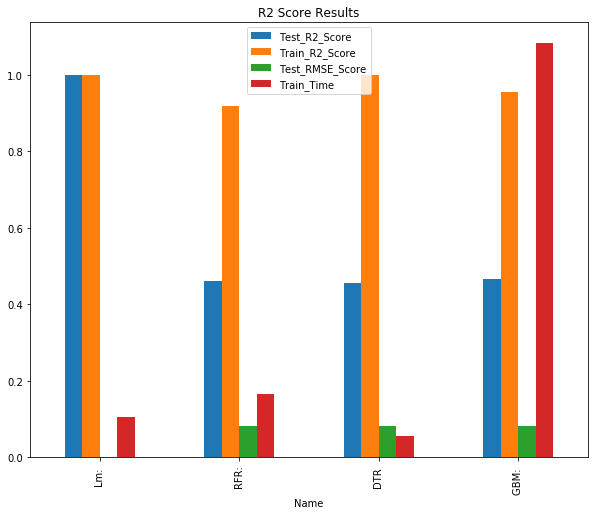

In [444]:
gf.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score','Train_Time'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

__It shows that train time is highest for GBM while lowest for DTR__<br>
__Test R2 score of Lm is highest while all other have same r2 score__<br>
__Train R2 score of DTR is highest while lowest for RFR and GBM__


__Here we are using RANDOM FOREST ELIMINATOR to find best features__

In [447]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [448]:

print('Chosen best 5 feature by rfe:',t.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['First Quartile Sales Price\n$'000s', 'Median Sales Price\n$'000s',
       'Third Quartile Sales Price\n'000s', 'Mean Sales Price\n$'000s',
       'Qtly change in Median'],
      dtype='object')


__It shows that First quartile ,median sales,third quartile ,mean sales,Qtl change in median is best feature out of other feature__